In [14]:
import lime, shap
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.inspection import PartialDependenceDisplay
from sklearn.pipeline import make_pipeline
import tensorflow as tf
from tensorflow.keras import models,layers

In [16]:
df = pd.read_csv('iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [17]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [19]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [20]:
X = df.drop('Species',axis=1)
y = df['Species']

le = LabelEncoder()
y = le.fit_transform(y)


In [21]:
X_tr, X_te, y_tr, y_te = train_test_split(X,y,test_size=0.2,random_state=42)

In [22]:
model1 = LinearRegression()
model1.fit(X_tr,y_tr)

LinearRegression()

In [27]:
PartialDependenceDisplay.from_estimator(model1,X_tr['SepalLengthCm'],features=y_t)

IndexError: tuple index out of range

In [100]:
model2 = LogisticRegression(max_iter=1000)
model2.fit(X_tr,y_tr)

LogisticRegression(max_iter=1000)

In [101]:
model3 = RandomForestClassifier()
model3.fit(X_tr,y_tr)

RandomForestClassifier()

In [126]:
shap_exp = shap.Explainer(model1,X_tr)
shap_val = shap_exp.shap_values(X_te)
shap_values = shap_exp(X_te)

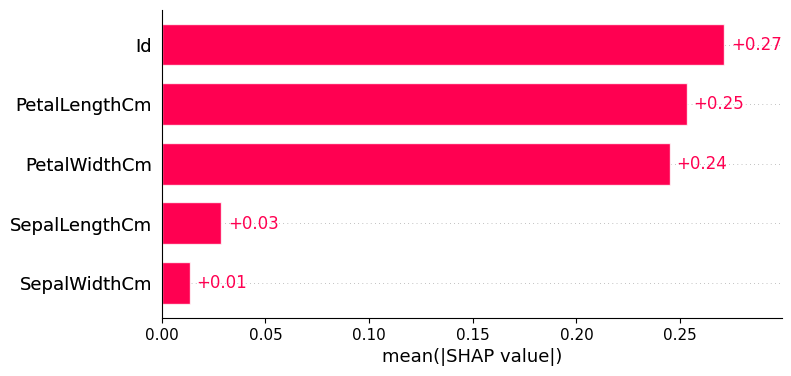

In [127]:
shap.plots.bar(shap_values)

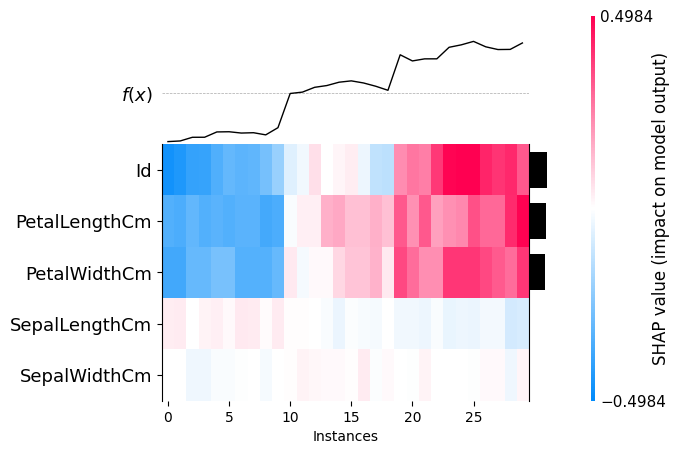

<Axes: xlabel='Instances'>

In [128]:
shap.plots.heatmap(shap_values)

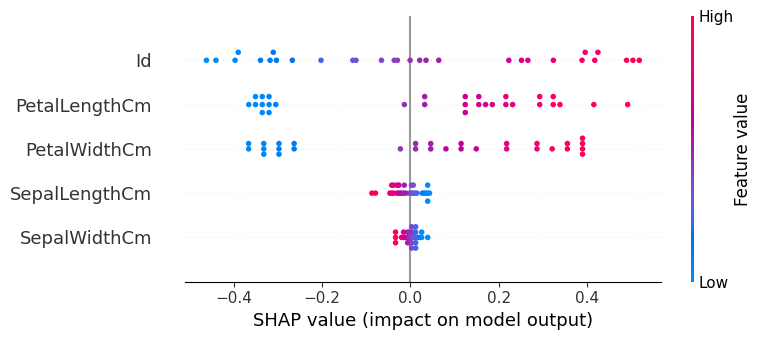

In [129]:
shap.summary_plot(shap_values)

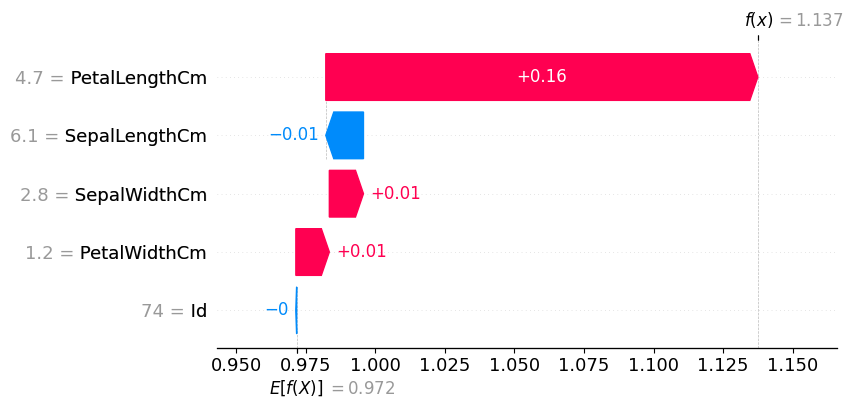

In [130]:
shap.plots.waterfall(shap_values[0])

In [136]:
shap.initjs()
shap.force_plot(shap_values)

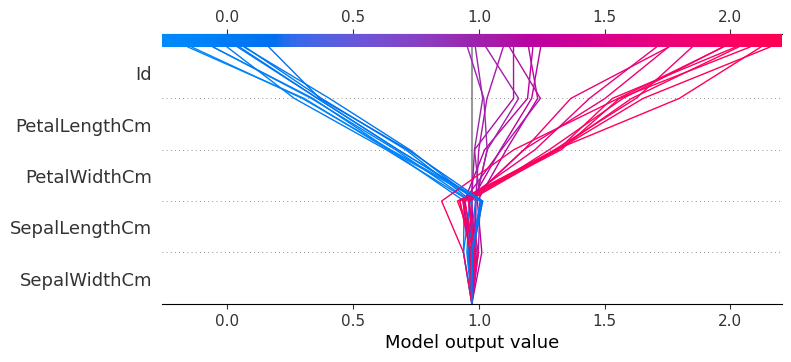

In [133]:
shap.decision_plot(shap_exp.expected_value, shap_val, X_te.iloc[2,:])

In [119]:
shap_ker = shap.KernelExplainer(model3.predict,X_tr)
shap_val = shap_ker(X_te)
shap_values = shap_ker.shap_values(X_te)

Using 120 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

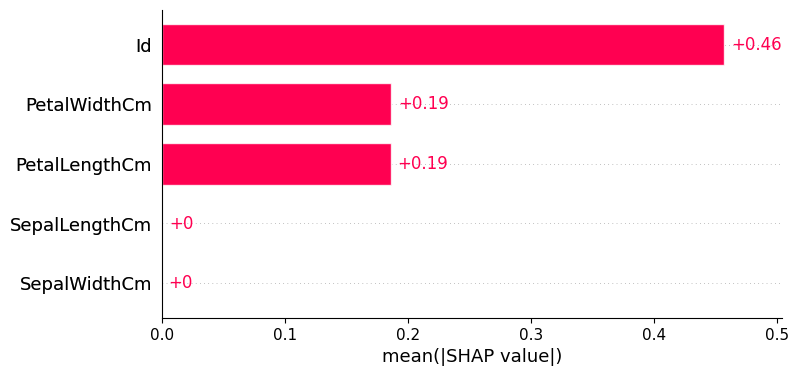

In [120]:
shap.plots.bar(shap_val)

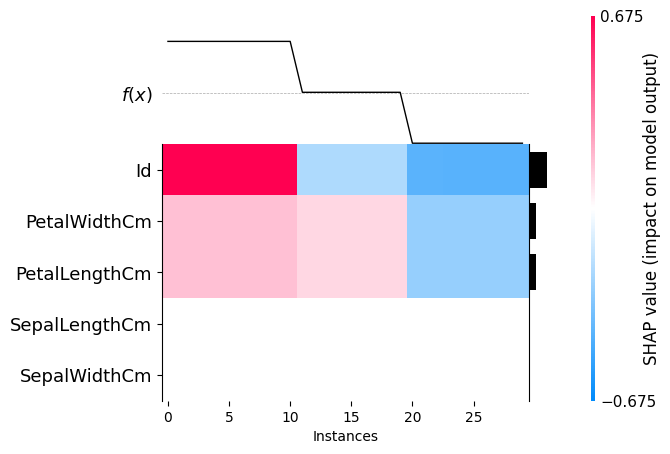

<Axes: xlabel='Instances'>

In [121]:
shap.plots.heatmap(shap_val)

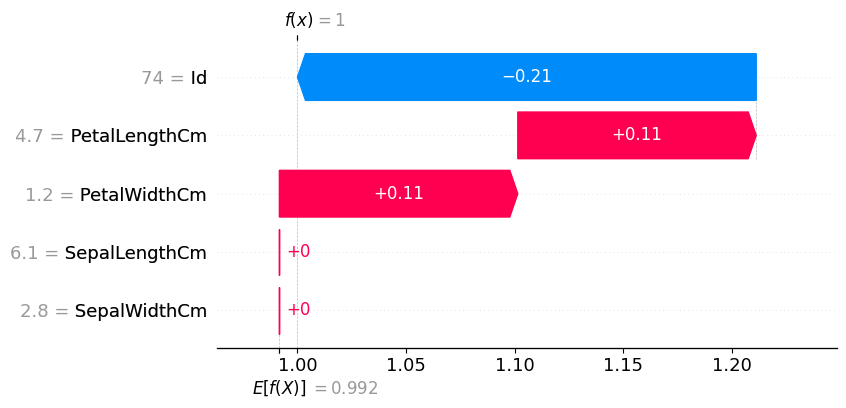

In [122]:
shap.plots.waterfall(shap_val[0])

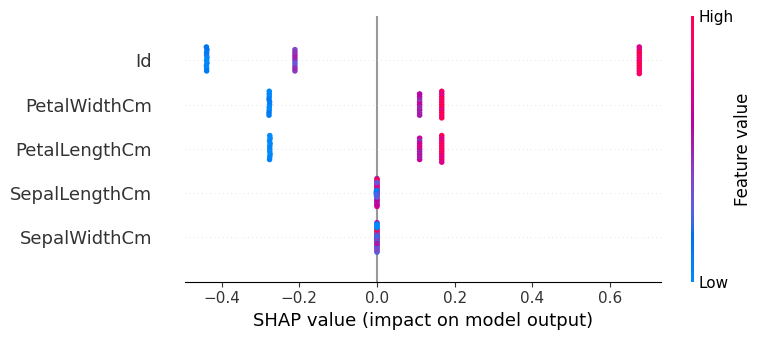

In [123]:
shap.summary_plot(shap_val)

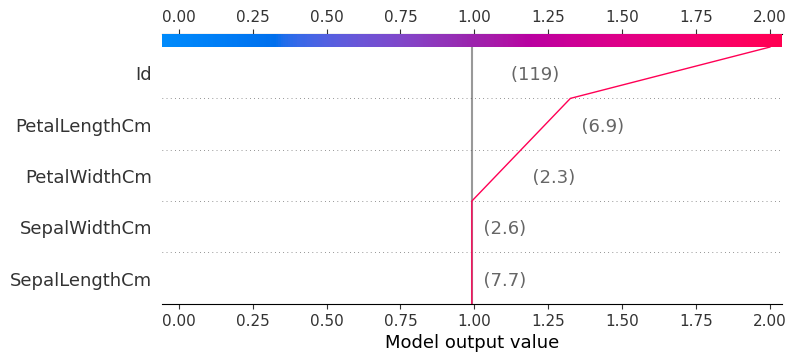

In [124]:
shap.decision_plot(shap_ker.expected_value, shap_values[2], X_te.iloc[2,:])

In [125]:
shap.initjs()
shap.force_plot(shap_val)

In [1]:
import tensorflow as tf

In [2]:
path = r'M:\train'

IMG_SIZE = (224,224)

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    path,
    subset='training',
    seed=42,
    batch_size=32,
    validation_split=0.2,
    image_size= IMG_SIZE,
    shuffle=True
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    path,
    subset='validation',
    seed=42,
    batch_size=32,
    validation_split=0.2,
    image_size= IMG_SIZE,
    shuffle=True
)


Found 5261 files belonging to 2 classes.
Using 4209 files for training.
Found 5261 files belonging to 2 classes.
Using 1052 files for validation.


In [3]:
train_len = len(train_ds)
val_len = len(val_ds)//2

val_ds = val_ds.take(val_len)
test_ds = val_ds.skip(val_len)

In [6]:
model = models.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(224,224,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.Flatten(),
    layers.Dense(2,activation='softmax')
])


E:\Xai_Req_Setup\Python3109\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
for img, lab in train_ds.take(1):
    bg = img[:1]
    image = img[1:5]
    break
bg = bg.numpy().astype(np.float32) / 255.0
image = image.numpy().astype(np.float32) / 255.0

shap_exp = shap.GradientExplainer(model, bg)


shap_values = shap_exp.shap_values(image)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-4.3655745685100555e-11..2.9103830456733704e-11].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.9103830456733704e-11..4.3655745685100555e-11].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-5.820766091346741e-11..4.3655745685100555e-11].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-5.820766091346741e-11..4.3655745685100555e-11].


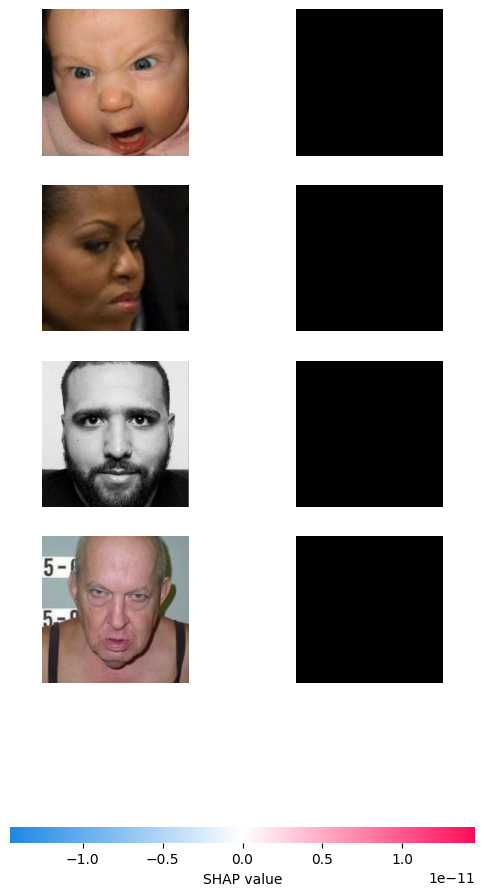

In [13]:

shap.image_plot(shap_values,image)